In [52]:
import pandas as pd
import numpy as np
import os
from typing import Tuple, List
import matplotlib.pyplot as plt

In [73]:
import os
import pandas as pd
import json
from matplotlib import pyplot as plt

def get_screen_size(metadata_file_path):
    with open(metadata_file_path, 'r') as f:
        metadata = json.load(f)

        # Check if 'screenData' is a key in the metadata
        if 'screenData' in metadata:
            metadata = metadata['screenData']
        # Otherwise, assume the metadata is already at the top level

        screen_width = metadata.get('screenWidth')
        screen_height = metadata.get('screenHeight')

        if screen_width is None or screen_height is None:
            raise ValueError("Screen size not found in metadata")
        return screen_width, screen_height

# Define quadrant grid size
grid_size = 5

# Function to calculate the quadrant for a given point
def calculate_quadrant(x, y, width, height, grid_size):
    quadrant_x = int((x / width) * grid_size)
    quadrant_y = int((y / height) * grid_size)
    # Adjust for edge cases where the gaze point is at the exact maximum of the screen's width/height
    quadrant_x = min(quadrant_x, grid_size - 1)
    quadrant_y = min(quadrant_y, grid_size - 1)
    return quadrant_x, quadrant_y

In [79]:
# Function to process the CSV files and count gaze points per quadrant
def process_gaze_data_per_user(base_dir, grid_size):
    user_quadrant_counts = {}
    quadrant_counts = [[0] * grid_size for _ in range(grid_size)]
    count = 0
    print('Processing gaze data...')

    # Only look at immediate subdirectories of the base_dir
    for user_dir in next(os.walk(base_dir))[1]:
        full_user_dir = os.path.join(base_dir, user_dir)
        print('Processing directory:', full_user_dir)
        
        metadata_file_path = os.path.join(full_user_dir, 'metadata.json')
        
        quadrant_counts = [[0] * grid_size for _ in range(grid_size)]
        full_user_dir = os.path.join(base_dir, user_dir)
        
        if os.path.exists(metadata_file_path):
            screen_width, screen_height = get_screen_size(metadata_file_path)

            # Process each CSV file in the user directory
            for file in os.listdir(full_user_dir):
                if file.endswith('.csv'):
                    print('Processing file:', file)
                    data_file_path = os.path.join(full_user_dir, file)
                    data = pd.read_csv(data_file_path, header=None, skiprows=1)
                    for index, row in data.iterrows():
                        gaze_x = float(row[1])
                        gaze_y = float(row[2])
                        qx, qy = calculate_quadrant(gaze_x, gaze_y, screen_width, screen_height, grid_size)
                        quadrant_counts[qy][qx] += 1
                        count += 1
            user_quadrant_counts[user_dir] = quadrant_counts        
        else:
            print(f"Metadata file not found in {full_user_dir}")
    
    print('Processed', count, 'gaze points.')
    return user_quadrant_counts

In [80]:
# Visualize the deviations
def visualize_deviations(deviations, title):
    plt.hist(deviations, bins=30)
    plt.title(title)
    plt.xlabel('Deviation')
    plt.ylabel('Frequency')
    plt.show()


In [81]:
def compare_users_to_perfect(perfect_user_data, all_user_data):
    comparisons = {}

    for user, quadrant_data in all_user_data.items():
        if user != 'William':
            comparison = [[0] * grid_size for _ in range(grid_size)]
            for i in range(grid_size):
                for j in range(grid_size):
                    # Example: calculate the percentage difference
                    if perfect_user_data[i][j] != 0:
                        difference = (quadrant_data[i][j] - perfect_user_data[i][j]) / perfect_user_data[i][j]
                    else:
                        difference = 0
                    comparison[i][j] = difference
            comparisons[user] = comparison

    return comparisons


In [82]:
def plot_comparison(comparison_data, grid_size, user):
    fig, ax = plt.subplots()
    ax.matshow(comparison_data, cmap='RdBu')

    for i in range(grid_size):
        for j in range(grid_size):
            c = comparison_data[j][i]
            ax.text(i, j, f"{c:.2f}", va='center', ha='center')

    plt.xlabel('Quadrant X')
    plt.ylabel('Quadrant Y')
    plt.title(f'Comparison of {user} to Perfect User')
    plt.show()

Processing gaze data...
Processing directory: data/eloise
Processing file: calibration_data.csv
Processing directory: data/Hossein
Processing file: calibration_data.csv
Processing file: data.csv
Processing directory: data/koala
Processing file: calibration_data.csv
Processing file: eye_gaze_data.csv
Processing directory: data/melissa
Processing file: calibration_data.csv
Processing file: data.csv
Processing directory: data/muzzy
Processing file: calibration_data.csv
Processing file: eye_gaze_data.csv
Processing directory: data/Naia
Processing file: calibration_data.csv
Processing file: eye_gaze_data.csv
Processing directory: data/PerfectUser
Processing file: calibration_data.csv
Processing file: eye_gaze_data.csv
Processing directory: data/Shaq
Processing file: calibration_data.csv
Processing file: data.csv
Processing directory: data/Will
Processing file: calibration_data.csv
Processing file: eye_gaze_data.csv
Processing directory: data/William
Processing file: calibration_data.csv
Pro

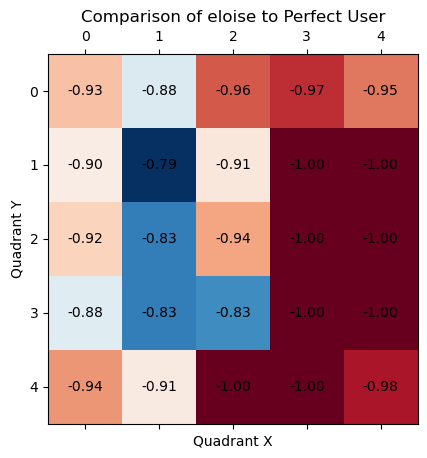

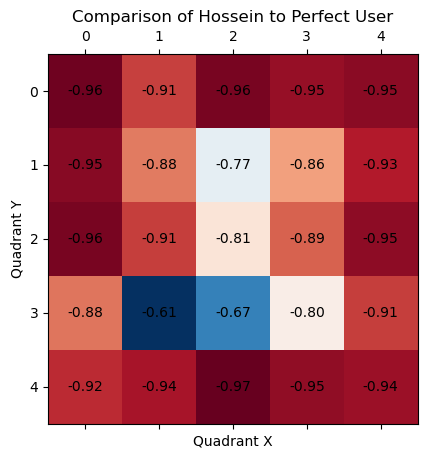

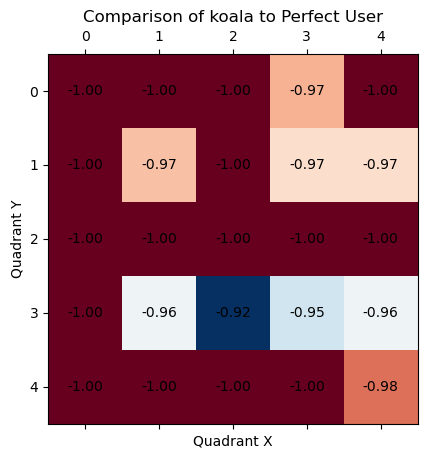

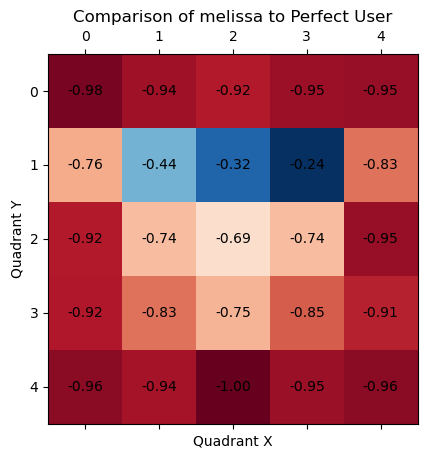

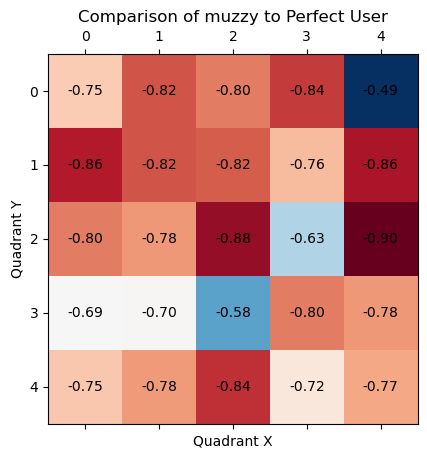

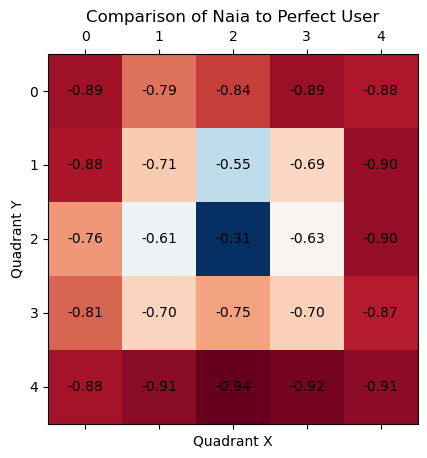

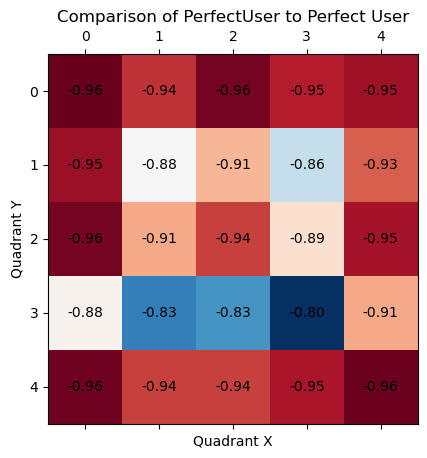

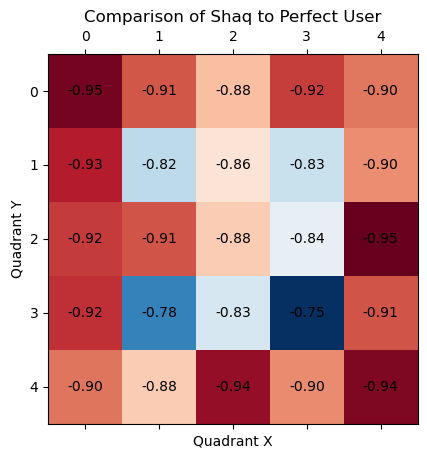

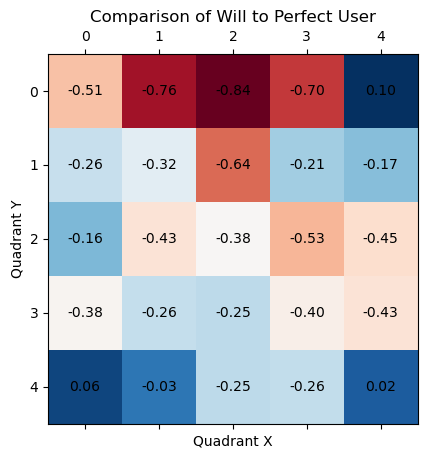

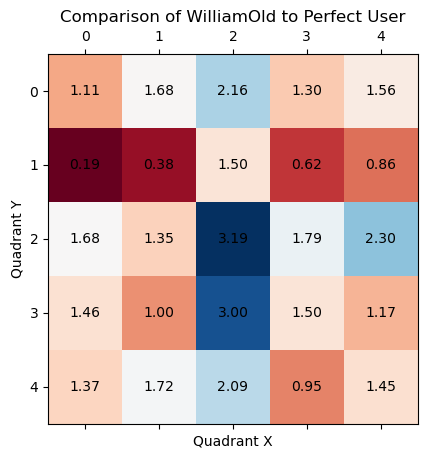

In [83]:
# Process the data
base_dir = 'data/'
user_quadrant_counts = process_gaze_data_per_user(base_dir, grid_size)

# Assume William is the perfect user
perfect_user_name = 'William'
perfect_user_data = user_quadrant_counts[perfect_user_name]

# Compare each user to the perfect user
comparisons = compare_users_to_perfect(perfect_user_data, user_quadrant_counts)

# Visualize the comparison for each user
for user, comparison_data in comparisons.items():
    plot_comparison(comparison_data, grid_size, user)
